In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy.fft import dct, idct
import numpy as np
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc

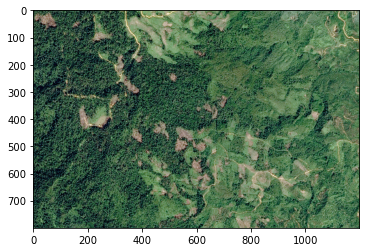

In [2]:
im = cv2.cvtColor(cv2.imread('terrain.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [3]:
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


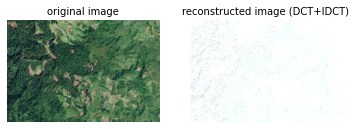

In [4]:

imF = dct2(im)
im1 = idct2(imF)



# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=10)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=10)
plt.show()

In [5]:
dct = np.zeros(im.shape)
N = 8 #dct_size
for i in r_[:im.shape[0]:N]:
    for j in r_[:im.shape[1]:N]:
        dct[i:(i+N),j:(j+N)] = dct2( im[i:(i+N),j:(j+N)] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 299.985104% of the DCT coefficients


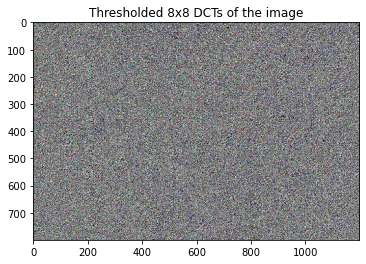

In [6]:
thresh = 0.0
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (im.shape[0]*im.shape[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

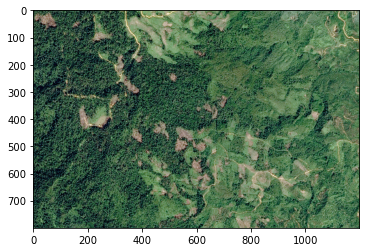

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


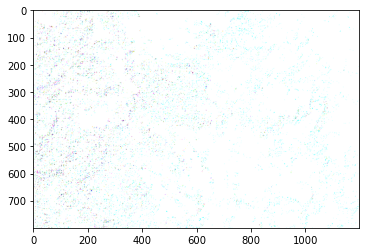

In [7]:
im_dct = np.zeros(im.shape)

for i in r_[:im.shape[0]:8]:
    for j in r_[:im.shape[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.imshow(im)
plt.show()
plt.imshow(im_dct)
plt.show()